In [2]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None

# Analysis parameters
immobile_stepsize_threshold_nm = 30
threshold_alpha = 0.7

# Single dataset configuration
label = "SPEN\nN="
color = "#552d9f"
postfix = "spt_analysis.png"

# Updated folder path
folder_save = "/Volumes/guttman/Guoming_Gao-Resnick/Data_BIF/DEFAULT_USER/20250424_ONIdemo_Guoming/Guoming_data/SPT"

# File names - update these based on actual files in your folder
fname_AIO = "SPT_results_AIO_concat-SPEN_20250424.csv"  # Update with actual filename
fname_saspt = "saSPT-pooled-mobile-SPEN_20250424.csv"  # Update with actual filename

### Load data

In [3]:
def only_load_frac_csv(path, one_in_x):
    """Load a fraction of CSV rows for large files"""
    total_rows = sum(1 for row in open(path))
    rows_to_read = range(0, total_rows, one_in_x)
    df = pd.read_csv(path, skiprows=lambda x: x not in rows_to_read)
    return df

## Data Loading
os.chdir(folder_save)

# Load main dataset
df = only_load_frac_csv(fname_AIO, 1)  # Adjust sampling rate as needed
print(f"Loaded {df.shape[0]:,} trajectories")

# Update label with count
label = label + f"{df.shape[0]:,}"
df.insert(0, "label", np.repeat(label, df.shape[0]))

# Load saSPT data
df_saspt_raw = pd.read_csv(fname_saspt, dtype=float)

def extract_log10D_density(df_current_file):
    """Extract log10D density from saSPT results"""
    range_D = df_current_file["diff_coef"].unique()
    log10D_density = []
    for log10D in range_D:
        df_current_log10D = df_current_file[df_current_file["diff_coef"] == log10D]
        log10D_density.append(df_current_log10D["mean_posterior_occupation"].sum())

    df_toplot = pd.DataFrame(
        {"log10D": np.log10(range_D), "Probability": log10D_density}, dtype=float
    )
    return df_toplot

df_saspt = extract_log10D_density(df_saspt_raw)
df_saspt.insert(0, "label", np.repeat(label, df_saspt.shape[0]))

Loaded 16,352 trajectories


# Plots

### Localization error

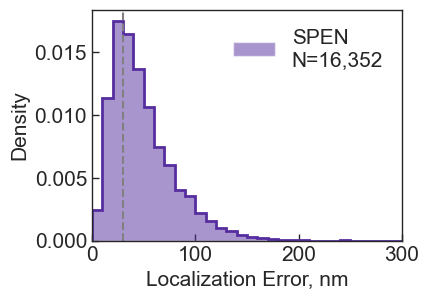

In [4]:
data = df[df["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["linear_fit_R2"] > 0.7]

plt.figure(figsize=(4, 3))
# Filled histogram
plt.hist(
    data["linear_fit_sigma"],
    bins=30,
    range=(0, 300),
    alpha=0.5,
    color=color,
    density=True,
    histtype="stepfilled",
    label=label,
)
# Dark outline
plt.hist(
    data["linear_fit_sigma"],
    bins=30,
    range=(0, 300),
    color=color,
    density=True,
    histtype="step",
    linewidth=2,
)
plt.axvline(immobile_stepsize_threshold_nm, ls="--", color="gray")
plt.xlim(0, 300)
plt.xlabel("Localization Error, nm", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend(fontsize=15, frameon=False)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("1.LocError_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

### Mean Step Size (whether static molecule)

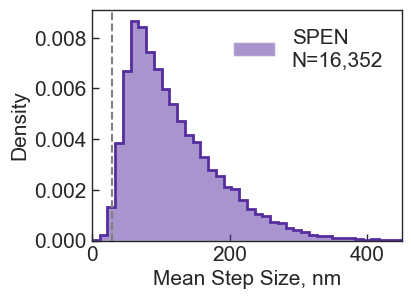

In [5]:
plt.figure(figsize=(4, 3))
# Filled histogram
plt.hist(
    df["mean_stepsize_nm"],
    bins=40,
    range=(0, 450),
    alpha=0.5,
    color=color,
    density=True,
    histtype="stepfilled",
    label=label,
)
# Dark outline
plt.hist(
    df["mean_stepsize_nm"],
    bins=40,
    range=(0, 450),
    color=color,
    density=True,
    histtype="step",
    linewidth=2,
)
plt.axvline(immobile_stepsize_threshold_nm, ls="--", color="gray")
plt.xlim(0, 450)
plt.xlabel("Mean Step Size, nm", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend(fontsize=15, frameon=False)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "2.mean_stepsize_nm_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)

### alpha distribution

Alpha component: 0.889 ± 0.004


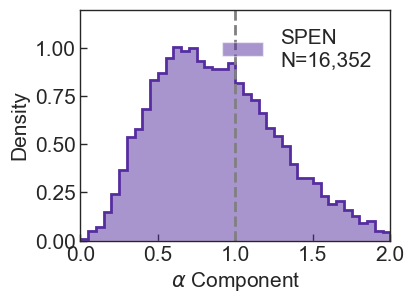

In [6]:
data = df[df["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]

plt.figure(figsize=(4, 3))
# Filled histogram
plt.hist(
    data["alpha"],
    bins=40,
    range=(0, 2),
    alpha=0.5,
    color=color,
    density=True,
    histtype="stepfilled",
    label=label,
)
# Dark outline
plt.hist(
    data["alpha"],
    bins=40,
    range=(0, 2),
    color=color,
    density=True,
    histtype="step",
    linewidth=2,
)
plt.axvline(1, color="gray", ls="--", lw=2)
plt.xlim(0, 2)
plt.ylim(0, 1.2)
plt.xlabel(r"$\alpha$ Component", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.legend(fontsize=15, frameon=False, loc=1)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("3.alpha_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
print(
    f"Alpha component: {data['alpha'].mean():.3f} ± {sem(data['alpha'].dropna()):.3f}"
)

### Angle Distribution

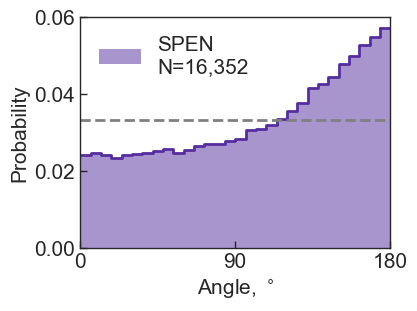

Mean angle: 104.82 ± 0.14°
Total angles analyzed: 141,386
Uniform baseline: 0.0333


In [7]:
## Plot 4: Angular Distribution (CORRECTED)
lst_angle = []
lst_label = []
for _, row in df[df["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_label,
    },
    dtype=object,
)

plt.figure(figsize=(4, 3))
bins = 30

# Calculate histogram with probability (not density)
counts, bin_edges = np.histogram(data["angle"], bins=bins, range=(0, 180))
probabilities = counts / counts.sum()  # Convert to probabilities
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

# Filled histogram
plt.bar(
    bin_centers,
    probabilities,
    width=bin_width,
    alpha=0.5,
    color=color,
    label=label,
    edgecolor="none",
)
# Dark outline
plt.step(bin_edges[:-1], probabilities, where="post", color=color, linewidth=2)
plt.step(
    [bin_edges[-2], bin_edges[-1]],
    [probabilities[-1], probabilities[-1]],
    color=color,
    linewidth=2,
)

# Uniform distribution baseline
plt.axhline(1 / bins, color="gray", ls="--", lw=2)

plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.06)
plt.xlabel("Angle, $^\\circ$", fontsize=15)
plt.ylabel("Probability", fontsize=15)
plt.legend(fontsize=15, frameon=False)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.savefig("4.angle_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)
plt.show()

print(f"Mean angle: {data['angle'].mean():.2f} ± {sem(data['angle'].dropna()):.2f}°")
print(f"Total angles analyzed: {len(data):,}")
print(f"Uniform baseline: {1/bins:.4f}")

### D distribution among the non contrained molecules

Mobile trajectories: 6,534


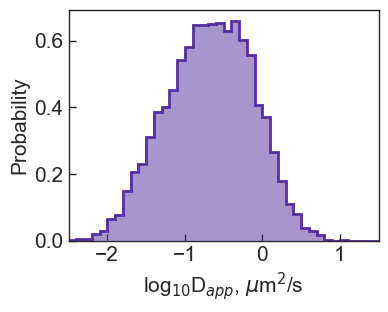

In [8]:
data = df[df["linear_fit_R2"] > 0.7]
data = data[data["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["alpha"] > 0.5]

plt.figure(figsize=(4, 3))
# Filled histogram
plt.hist(
    data["linear_fit_log10D"],
    bins=40,
    range=(-2.5, 1.5),
    alpha=0.5,
    color=color,
    density=True,
    histtype="stepfilled",
    label=label,
)
# Dark outline
plt.hist(
    data["linear_fit_log10D"],
    bins=40,
    range=(-2.5, 1.5),
    color=color,
    density=True,
    histtype="step",
    linewidth=2,
)
plt.xlim(-2.5, 1.5)
plt.xticks([-2, -1, 0, 1])
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=15)
plt.ylabel("Probability", fontsize=15)
# plt.legend(fontsize=15, frameon=False, )
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "5.ApparentD_linear_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)

print(f"Mobile trajectories: {data.shape[0]:,}")

### Plot saSPT

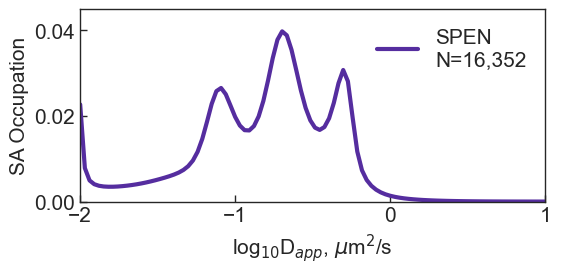

In [18]:
plt.figure(figsize=(6, 2.5))
plt.plot(
    df_saspt["log10D"], df_saspt["Probability"], color=color, linewidth=3, label=label
)
plt.xlim(-2, 1)
plt.xticks([-2, -1, 0, 1])
plt.ylim(0, 0.045)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=15)
plt.ylabel("SA Occupation", fontsize=15)
plt.legend(fontsize=15, frameon=False)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=15,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("6.saspt_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

In [10]:
def find_major_peak(x, y):
    """Find the x value corresponding to the major peak"""
    peaks, _ = find_peaks(y)
    if len(peaks) == 0:
        return None
    major_peak_index = peaks[np.argmax(y[peaks])]
    major_peak_x = x[major_peak_index]
    major_peak_y = y[major_peak_index]
    return major_peak_x, major_peak_y


major_peak_x, major_peak_y = find_major_peak(
    df_saspt["log10D"].to_numpy(float), df_saspt["Probability"].to_numpy(float)
)
print(f"Major peak diffusion coefficient: {10**major_peak_x:.2e} μm²/s")

Major peak diffusion coefficient: 2.01e-01 μm²/s


### Stacked bar plot of fractions

#### Prepare plot df, calculate p vals

In [11]:
## Fraction Analysis
# Load full dataset for replicate analysis
df_full = pd.read_csv(fname_AIO)
df_full = df_full.astype(
    {"linear_fit_log10D": float, "mean_stepsize_nm": float, "alpha": float}
)

# Analyze fractions by replicate
all_filenames = df_full["filename"].unique().tolist()
replicate_prefixes = np.unique([f.split("FOV")[0] for f in all_filenames])

fractions_data = []
for prefix in replicate_prefixes:
    current_replicate_filenames = [f for f in all_filenames if prefix in f]
    df_replicate = df_full[df_full["filename"].isin(current_replicate_filenames)]

    # Calculate fractions
    df_mobile = df_replicate[
        df_replicate["mean_stepsize_nm"] >= immobile_stepsize_threshold_nm
    ]
    df_constrained = df_mobile[df_mobile["alpha"] <= threshold_alpha]

    N_total = df_replicate.shape[0]
    N_mobile = df_mobile.shape[0]
    N_constrained = df_constrained.shape[0]

    if N_constrained < 1:
        continue

    F_immobile = (N_total - N_mobile) / N_total
    F_constrained = N_constrained / N_mobile
    F_normal = (N_mobile - N_constrained) / N_total

    fractions_data.append(
        [prefix, N_total, N_mobile, N_constrained, F_immobile, F_constrained, F_normal]
    )

# Create summary statistics
fractions_df = pd.DataFrame(
    fractions_data,
    columns=[
        "prefix",
        "N_total",
        "N_mobile",
        "N_constrained",
        "F_immobile",
        "F_constrained",
        "F_normal",
    ],
)

## Summary Statistics
print("\n" + "=" * 50)
print("SUMMARY STATISTICS")
print("=" * 50)
print(f"Dataset: {label}")
print(f"Total trajectories: {df_full.shape[0]:,}")
print(f"Replicates analyzed: {len(fractions_df)}")
print(
    f"Immobile fraction: {fractions_df['F_immobile'].mean():.3f} ± {fractions_df['F_immobile'].std():.3f}"
)
print(
    f"Constrained fraction: {fractions_df['F_constrained'].mean():.3f} ± {fractions_df['F_constrained'].std():.3f}"
)
print(
    f"Normal diffusion fraction: {fractions_df['F_normal'].mean():.3f} ± {fractions_df['F_normal'].std():.3f}"
)


SUMMARY STATISTICS
Dataset: SPEN
N=16,352
Total trajectories: 16,352
Replicates analyzed: 3
Immobile fraction: 0.010 ± 0.002
Constrained fraction: 0.669 ± 0.012
Normal diffusion fraction: 0.328 ± 0.013


#### Plot

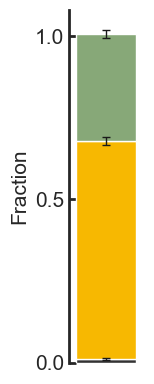

In [12]:
fig, ax = plt.subplots(figsize=(1.7, 4))
categories = ["Immobile", "Constrained", "Normal"]
values = [
    fractions_df["F_immobile"].mean(),
    fractions_df["F_constrained"].mean(),
    fractions_df["F_normal"].mean(),
]
errors = [
    fractions_df["F_immobile"].std(),
    fractions_df["F_constrained"].std(),
    fractions_df["F_normal"].std(),
]
colors = ["#333232", "#f7b801", "#87a878"]

bottom = 0
for i, (cat, val, err, col) in enumerate(zip(categories, values, errors, colors)):
    ax.bar(
        1,
        val,
        yerr=err,
        bottom=bottom,
        color=col,
        error_kw={"elinewidth": 1},
        capsize=3,
    )
    bottom += val

ax.set_ylim(0, 1.08)
ax.set_xlim(0.5, 1.5)
ax.set_ylabel("Fraction", fontsize=15)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 1])
ax.spines[:].set_linewidth(2)
ax.spines[["right", "top", "bottom"]].set_visible(False)
ax.tick_params(
    axis="y", which="major", labelsize=15, direction="in", left=True, length=5, width=2
)
plt.tight_layout()
plt.savefig(
    "7.fractions_summary_" + postfix, format="png", bbox_inches="tight", dpi=300
)